In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings("ignore")

3.2    Task #1:  Unsupervised learning, PCA of NIR dataA.  
Generate the plot of all the training set raw NIR data.

In [70]:
#loading train data
df = pd.read_excel('/content/sawdust_train.xlsx')

In [71]:
#loading test data
df_test = pd.read_excel('/content/sawdust_pred.xlsx')

In [72]:
df.shape

(30, 1206)

In [73]:
df.columns

Index(['Primary ID', 'OBSNAM', 'w1100', 'w1101', 'w1102', 'w1103', 'w1104',
       'w1105', 'w1106', 'w1107',
       ...
       'w2294', 'w2295', 'w2296', 'w2297', 'w2298', 'w2299', 'w2300', 'Spruce',
       'Pine', 'Birch'],
      dtype='object', length=1206)

In [74]:
#checking null values
df.isnull().sum()

Primary ID    0
OBSNAM        0
w1100         0
w1101         0
w1102         0
             ..
w2299         0
w2300         0
Spruce        0
Pine          0
Birch         0
Length: 1206, dtype: int64

In [75]:
#defining target variable
x_train = df.iloc[:,2:1203]
y_train = df.iloc[:,1203:]
print(x_train.shape)
print(y_train.shape)

(30, 1201)
(30, 3)


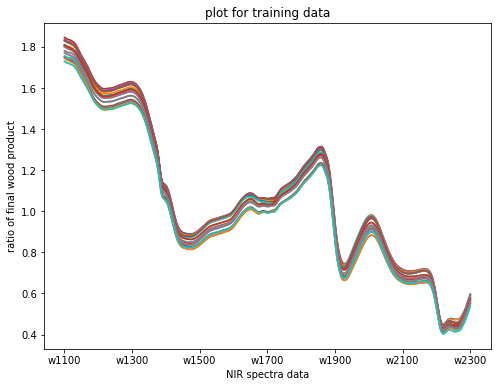

In [76]:
x_train.transpose().plot(legend=None,
                            figsize=(8,6),
                            title='plot for training data',
                            xlabel='NIR spectra data',
                            ylabel='ratio of final wood product')

B.  Pre-process the NIR data and perform PCA for 5 components.

In [77]:
#Standardise training data
sc = StandardScaler(with_std=False)
X_train = sc.fit_transform(x_train)

In [78]:
pca = PCA(n_components=5, svd_solver='full')

In [79]:
pca_scores = pca.fit_transform(X_train)
pca_scores.shape

(30, 5)

In [80]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = x_train.index)
scores_pd

,PC1,PC2,PC3,PC4,PC5
0,-1.078295,-0.047001,0.251280,0.024857,0.003036
1,-0.929153,-0.060230,0.245587,0.000213,-0.003432
2,-1.022756,-0.305001,-0.042607,0.020161,-0.021894
3,-1.019964,-0.295982,-0.037858,0.021896,-0.026418
4,-1.184856,-0.018965,0.083824,-0.021246,-0.009141
5,-1.095564,0.004305,0.085434,-0.023682,-0.008591
6,-0.429080,0.383454,-0.016684,0.107723,-0.004963
7,-0.482592,0.379079,-0.008178,0.101704,-0.004043
8,0.070632,-0.290886,-0.044821,0.048580,-0.003262
9,0.198855,-0.264795,-0.043709,0.049472,-0.002781


In [81]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                           ,index = x_train.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


C.  Plot the cumulative explained variance versus the number of components.  How manycomponents do we need to capture 99% of the variance?

**Answer: Two PCs capture 99% variance**

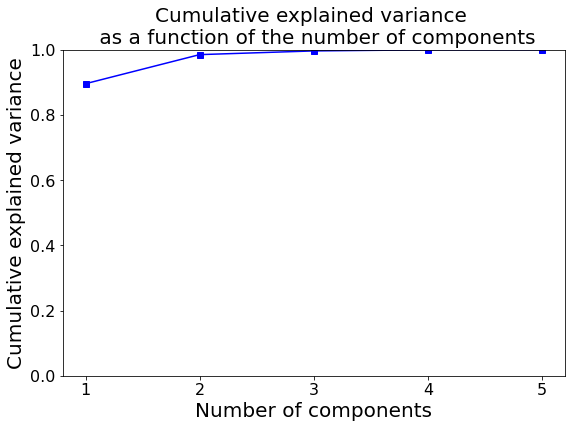

In [82]:
fig = plt.figure(figsize=(9, 6))
sub0 = fig.add_subplot(111)
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'b-s')
sub0.set_xlabel('Number of components', fontsize=20)
sub0.set_ylabel('Cumulative explained variance', fontsize=20)
sub0.set_title('Cumulative explained variance \n as a function of the number of components', fontsize=20)
sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

D.  Plot the PCA scores for the first two components.  Comment on any outliers, trends,clusters etc (if any).

**Our plot show trends of overlapping clusters with consecutive adjacent values(eg:16,17 & 12,13 etc.). Since the clusters are randomly distributed we cannot comment on outliers from this graph**

In [83]:
def score_plot(scores, score_labels=None):
    
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11)
        
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

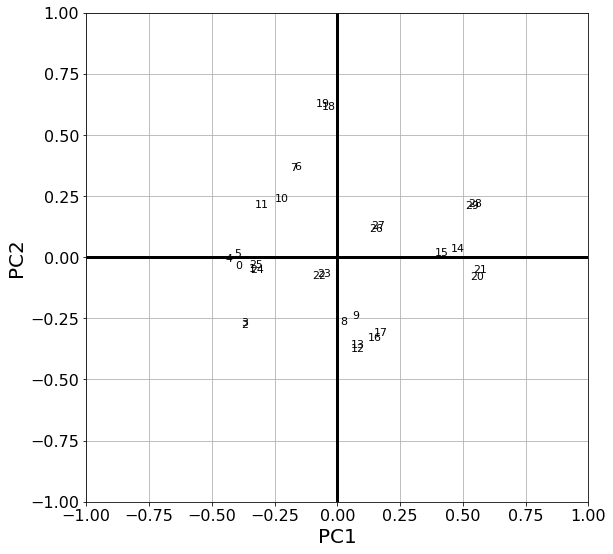

In [84]:
score_plot(pca_scores[:,:2], score_labels=scores_pd.index)
plt.show()

E.  Plot  the  loadings  of  the  first  two  components  and  comment  on  which  wavelengths seem to be important for different PCs.Don’t describe the graphs in words.  In two sentences, describe any significant trends or signals (if any).

**Answer: PC1: Although the graph for PC1 has a lot irregularities, we can observe that PC1 capture more information for wavelengths w2200, w2100, w2150
PC2 descibes more information about wavelengths w1550, w2000.**


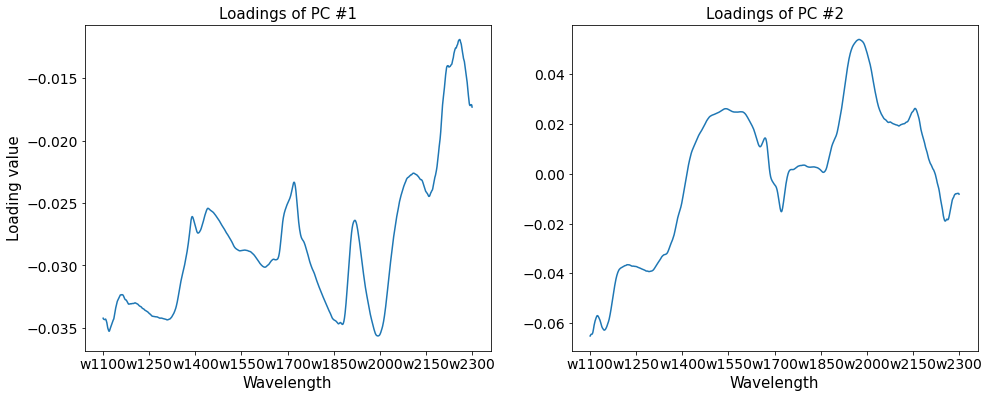

In [85]:
fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_pd['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=15)
sub1.set_ylabel('Loading value', fontsize=15)
sub1.set_title('Loadings of PC #1', fontsize=15)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_pd['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=15)
sub2.set_title('Loadings of PC #2', fontsize=15)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

plt.show()

F.  Apply the dimensionality reduction with the PCA model you developed in step B for the test set using the transform method.

In [86]:
df_test.tail()

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,...,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
19,46,22b,1.77995,1.77966,1.77923,1.77846,1.77725,1.77574,1.77431,1.77312,1.77233,1.77172,1.77140,1.77125,1.77122,1.77095,1.77042,1.76977,1.76903,1.76809,1.76705,1.76604,1.76516,1.76451,1.76386,1.76313,1.76217,1.76117,1.76009,1.75886,1.75743,1.75594,1.75430,1.75257,1.75052,1.74817,1.74545,1.74266,1.73973,1.73661,...,0.431652,0.432587,0.433511,0.434995,0.437014,0.439554,0.442457,0.445154,0.447773,0.450900,0.453942,0.456913,0.459356,0.461966,0.464982,0.468257,0.471824,0.475689,0.479674,0.484519,0.489790,0.494317,0.498685,0.502920,0.507885,0.512540,0.516862,0.521615,0.526644,0.532004,0.537554,0.542684,0.547631,0.553138,0.558637,0.563911,0.568172,40,10,50
20,49,19a,1.73468,1.73445,1.73383,1.73266,1.73098,1.72904,1.72734,1.72608,1.72527,1.72460,1.72412,1.72361,1.72324,1.72255,1.72166,1.72076,1.71988,1.71899,1.71808,1.71709,1.71622,1.71553,1.71482,1.71403,1.71298,1.71193,1.71081,1.70952,1.70803,1.70650,1.70486,1.70323,1.70140,1.69933,1.69699,1.69465,1.69225,1.68966,...,0.419773,0.420838,0.421676,0.422858,0.424130,0.425481,0.427069,0.428530,0.430296,0.432966,0.436042,0.439202,0.441717,0.444234,0.447029,0.449697,0.452247,0.455003,0.457700,0.461149,0.465041,0.468575,0.472507,0.476742,0.482092,0.487234,0.491900,0.496695,0.501542,0.506513,0.511648,0.516482,0.521279,0.526603,0.531749,0.536373,0.540071,50,40,10
21,50,19b,1.73263,1.73230,1.73186,1.73107,1.72986,1.72831,1.72686,1.72571,1.72492,1.72415,1.72355,1.72304,1.72269,1.72206,1.72131,1.72029,1.71925,1.71815,1.71702,1.71594,1.71500,1.71438,1.71386,1.71311,1.71219,1.71130,1.71033,1.70923,1.70792,1.70652,1.70497,1.70334,1.70146,1.69933,1.69693,1.69456,1.69218,1.68962,...,0.421477,0.422098,0.422510,0.423270,0.424240,0.425609,0.427365,0.429012,0.430748,0.432964,0.435362,0.437887,0.440214,0.442736,0.445793,0.449156,0.452780,0.456401,0.459821,0.463550,0.467491,0.470827,0.474246,0.477824,0.482367,0.486963,0.491433,0.496179,0.501179,0.506419,0.511755,0.516684,0.521484,0.526615,0.531580,0.536271,0.540210,50,40,10
22,51,24a,1.77784,1.77755,1.77692,1.77584,1.77437,1.77268,1.77125,1.77023,1.76968,1.76924,1.76904,1.76890,1.76894,1.76876,1.76835,1.76787,1.76726,1.76646,1.76549,1.76436,1.76326,1.76235,1.76144,1.76050,1.75939,1.75828,1.75714,1.75584,1.75430,1.75261,1.75075,1.74881,1.74674,1.74447,1.74198,1.73947,1.73688,1.73404,...,0.423835,0.424437,0.424900,0.425753,0.427082,0.428996,0.431355,0.433705,0.436090,0.439153,0.442434,0.445738,0.448626,0.451525,0.454725,0.457978,0.461278,0.464707,0.468258,0.472627,0.477539,0.481885,0.486175,0.490378,0.495201,0.499790,0.504154,0.508909,0.513924,0.519348,0.524911,0.530095,0.534893,0.540095,0.545327,0.550271,0.554393,10,40,50
23,52,24b,1.78323,1.78251,1.78175,1.78079,1.77954,1.77807,1.77681,1.77582,1.77525,1.77468,1.77436,1.77409,1.77393,1.77355,1.77297,1.77228,1.77151,1.77063,1.76971,1.76874,1.76787,1.76721,1.76658,1.76582,1.76476,1.76363,1.76238,1.76092,1.75921,1.75733,1.75530,1.75317,1.75093,1.74846,1.74576,1.74305,1.74032,1.73744,...,0.425390,0.426223,0.426981,0.427963,0.429206,0.430891,0.432877,0.434923,0.437104,0.439929,0.443096,0.446227,0.448990,0.451998,0.455424,0.459226,0.463229,0.467273,0.471333,0.475782,0.480528,0.484625,0.488508,0.492450,0.497081,0.501480,0.505779,0.510302,0.515209,0.520447,0.525636,0.530429,0.534841,0.539714,0.544764,0.549556,0.553724,10,40,50


In [87]:
#checking null values in the test datatset
df_test.isnull().sum()

Primary ID    0
OBSNAM        0
w1100         0
w1101         0
w1102         0
             ..
w2299         0
w2300         0
Spruce        0
Pine          0
Birch         0
Length: 1206, dtype: int64

In [88]:
#defining x and y for test data
x_test = df_test.iloc[:,2:1203]
y_test = df_test.iloc[:,1203:]
print(y_test.shape)
print(x_test.shape)

(24, 3)
(24, 1201)


In [89]:
# Using the train set scalar to transform the test set
X_test = sc.transform(x_test)

In [90]:
pca_scores_test = pca.transform(X_test)

In [91]:
scores_pd_test = pd.DataFrame(data = pca_scores_test
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = x_test.index)
scores_pd_test

,PC1,PC2,PC3,PC4,PC5
0,-0.755046,0.082224,-0.106194,-0.006280,-0.046023
1,-0.741493,0.043018,-0.104981,-0.027725,-0.054997
2,0.526514,-0.235156,0.004148,0.154854,-0.024401
3,0.670262,-0.195146,0.011119,0.151286,-0.022596
4,0.795253,-0.046558,0.035398,-0.030072,-0.035528
5,0.901669,0.006261,0.039356,-0.028244,-0.028235
6,-0.215814,-0.066147,-0.061746,0.075020,-0.013988
7,-0.286806,-0.037825,-0.066603,0.083834,-0.004424
8,0.614048,-0.071040,0.078673,-0.036015,-0.001160
9,0.470886,-0.084499,0.079847,-0.041845,0.004262


In [92]:
loadings_pd_test = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                           ,index = x_test.columns)
loadings_pd_test

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


G.  Create a scatter plot of the scores in PC1, PC2 of all 54 points in the train and test data set, coloured by the set they belong to (suggestion:  use sns.scatterplot).  Why isit important to overlap the scores of both train and test set in one graph?  What are you checking to see?

**Answer: From the plot we can observe that data points belonging to test and train category are clustered distinctly. This means that the our principal components capture enough information to discriminate between the data from the sets. This in turn verifies that the scores and loadings of our data points are not completely random and can be used to predict the target variable and has potential to generalize**


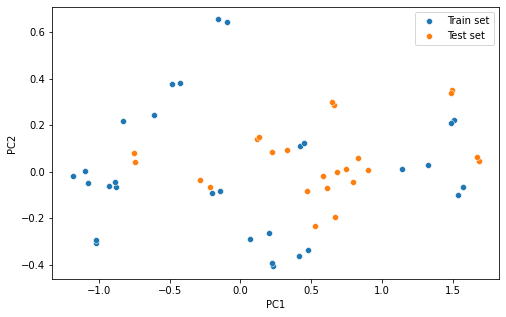

In [93]:
plt.figure(figsize=(8,5))
sns.scatterplot(scores_pd['PC1'],scores_pd['PC2'])
sns.scatterplot(scores_pd_test['PC1'],scores_pd_test['PC2'])
plt.legend(['Train set', 'Test set'])
plt.show()

A.  Run  the  PLS  regression  to  model  all  3  outputs  with  the  scaled  train  set  spectra.Increase the number of components to achieve R2 value of at least 0.92 (use PLSRe-gression’s method score to estimate R2).

In [94]:
pls_sklearn = PLSRegression(n_components=2, scale=False)
pls_sklearn.fit(X_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06)

In [95]:
print('Score when number of components equal to 2 :', (pls_sklearn.score(X_train,y_train))*100)

Score when number of components equal to 2 : 46.52050027019713


In [96]:
pls_sklearn = PLSRegression(n_components=3, scale=False)
pls_sklearn.fit(X_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06)

In [97]:
print('Score when number of components equal to 3 :', (pls_sklearn.score(X_train,y_train))*100)

Score when number of components equal to 3 : 92.40392024759805


In [98]:
pls_sklearn = PLSRegression(n_components=4, scale=False)
pls_sklearn.fit(X_train, y_train)
print('Score when number of components equal to 4 :', (pls_sklearn.score(X_train,y_train))*100)

Score when number of components equal to 4 : 97.90465508514916


B.  Predict  the  output  values  for  the  inputs  in  the  test  set  and  compare  them  by  plot-ting  the  24  actual  vs  predicted  values  in  a  1x3  subplot  (for  spruce,  pine  and  birch,respectively).  Also, include the y=x line for reference.

In [99]:
y_train_predicted = pls_sklearn.predict(X_train)
y_test_predicted = pls_sklearn.predict(X_test)

(0.0, 100.0)

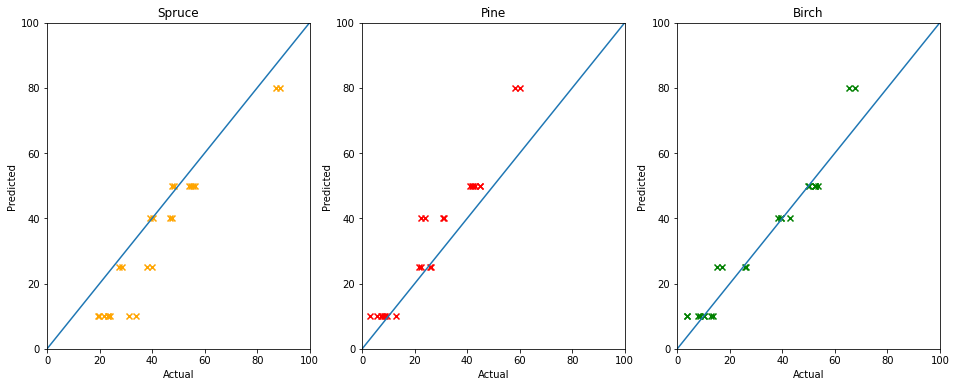

In [100]:
fig, axes = plt.subplots(1,3,figsize=(16,6))
axes[0].scatter(y_test_predicted[:,0],y_test.iloc[:,0],color = 'orange',marker = 'x')
axes[0].set_title('Spruce')
axes[0].set_ylabel('Predicted')
axes[0].set_xlabel('Actual')
axes[0].plot([0, 100], [0, 100])
axes[0].set_xlim([0, 100])
axes[0].set_ylim([0, 100])

axes[1].scatter(y_test_predicted[:,1],y_test.iloc[:,1],color = 'red',marker = 'x')
axes[1].set_title('Pine')
axes[1].set_ylabel('Predicted')
axes[1].set_xlabel('Actual')
axes[1].plot([0, 100], [0, 100])
axes[1].set_xlim([0, 100])
axes[1].set_ylim([0, 100])

axes[2].scatter(y_test_predicted[:,2],y_test.iloc[:,2],  color = 'g',marker = 'x')
axes[2].set_title('Birch')
axes[2].set_ylabel('Predicted')
axes[2].set_xlabel('Actual')
axes[2].plot([0, 100], [0, 100])
axes[2].set_xlim([0, 100])
axes[2].set_ylim([0, 100])
